# Project Outline - Water Quality

- Water Quality Dataset from Kaggel - https://www.kaggle.com/adityakadiwal/water-potability

- Predicting podability based on existing features without potability feature

- Testing our predictions on original database potability feature

- Create a feature that is MORE then binary for potability

In [1]:
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns
import pydotplus

from six             import StringIO
from IPython.display import Image
from data.ds_models       import ds_models

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline                import Pipeline
from sklearn.impute                  import SimpleImputer
from sklearn.preprocessing           import StandardScaler, OneHotEncoder, normalize
from sklearn.model_selection         import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics                 import mean_squared_error, mean_squared_log_error, accuracy_score
from sklearn.metrics                 import plot_confusion_matrix, classification_report

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors    import KNeighborsClassifier
from sklearn.naive_bayes  import GaussianNB
from sklearn.tree         import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble     import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble     import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm          import SVC

import warnings
warnings.filterwarnings('ignore')

# Data Exploration and Cleaning

In [2]:
df = pd.read_csv('data/water_potability.csv')

### Raw Potability Histogram

(array([1998.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1278.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

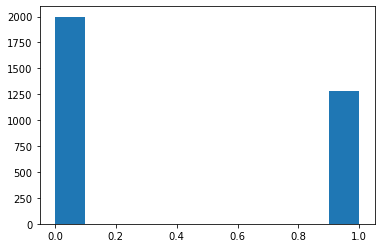

In [3]:
plt.hist(df['Potability'])

### Cleaning NaN values

In [4]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [5]:
df1 = df.dropna()

### Clean Potability Histogram

(array([1200.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         811.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

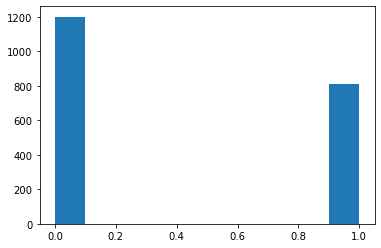

In [6]:
plt.hist(df1['Potability'])

# Data Instantiation

In [7]:
X = df1.drop(columns=['Potability'], axis=1)
y = df1['Potability']

# Model Instantiations

## Gaussian Naive Bayes

In [8]:
#model = GaussianNB()
#model = BaggingClassifier(GaussianNB())
#model = AdaBoostClassifier(GaussianNB())

## KNeighbors Classifier

In [9]:
#model = KNeighborsClassifier()
#knc_grid   = {'n_neighbors': [1, 2, 3, 4, 5], 'weights': ['uniform', 'distance']}
#model      = GridSearchCV(KNeighborsClassifier(), knc_grid, scoring='accuracy', verbose=1)
#model      = AdaBoostClassifier(KNeighborsClassifier())

## Logistic Regression

In [10]:
#model = LogisticRegression(fit_intercept = False, C = 1e12, solver='lbfgs', multi_class='auto')
#logreg_grid = {'C': [1, 2, 3], 'solver': [‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’]}
#model       = GridSearchCV(LogisticRegression(), logreg_grid, scoring='accuracy', verbose=1)

## Decision Tree Classifier

In [11]:
#model = DecisionTreeClassifier()
#dtc_grid = {'criterion': ['gini', 'entropy'], 'max_depth':[1, 2, 3, 4, 5]}
#model    = GridSearchCV(DecisionTreeClassifier(), dtc_grid, scoring='accuracy', verbose=1)

## Bagging Classifier

In [12]:
#model = BaggingClassifier()
#bc_grid = {'n_estimators': [10, 20, 30, 40, 50], 'oob_score':['True', 'False']}
#model   = GridSearchCV(BaggingClassifier(), bc_grid, scoring='accuracy', verbose=1)

## Random Forest Classifier

In [13]:
#model = RandomForestClassifier()
#rfc_grid = {'n_estimators': [100, 200], 'criterion':['gini', 'entropy'], 
#            'oob_score':['True', 'False'], 'max_depth': [3, 4, 5, 6, 7, 8]}
#model    = GridSearchCV(RandomForestClassifier(), rfc_grid, scoring='accuracy', verbose=1)

## Adaptive Boosting Classifier

In [14]:
#model = AdaBoostClassifier()

## Gradient Boosting Classifier

In [15]:
#model = GradientBoostingClassifier()

## Support Vector Classification

In [16]:
#model = SVC()
#svc_grid = {'C': [1, 2, 3], 'kernel': [‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’]}
#model    = GridSearchCV(SVC(), svc_grid, scoring='accuracy', verbose=1)

# Model Testing 

### Gaussian Naive Bayes - Vanilla

Gaussian Naive Bayes - Vanilla Train Data Confusion Matrix:



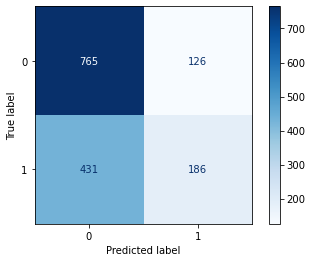

Gaussian Naive Bayes - Vanilla Test Data Confusion Matrix:



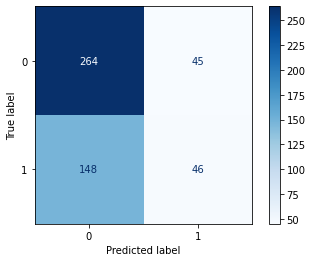

Gaussian Naive Bayes - Vanilla Train Report:

              precision    recall  f1-score   support

           0       0.64      0.86      0.73       891
           1       0.60      0.30      0.40       617

    accuracy                           0.63      1508
   macro avg       0.62      0.58      0.57      1508
weighted avg       0.62      0.63      0.60      1508

Gaussian Naive Bayes - Vanilla Test Report:

              precision    recall  f1-score   support

           0       0.64      0.85      0.73       309
           1       0.51      0.24      0.32       194

    accuracy                           0.62       503
   macro avg       0.57      0.55      0.53       503
weighted avg       0.59      0.62      0.57       503



In [17]:
model = GaussianNB()

gnb = ds_models(model, X, y, model_name='Gaussian Naive Bayes - Vanilla', output='class')

### KNeighbors Classifier - Vanilla

KNeighbors Classifier - Vanilla Train Data Confusion Matrix:



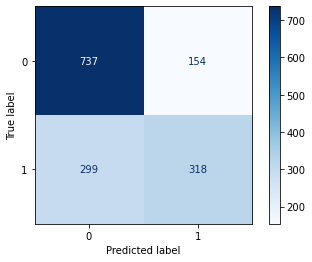

KNeighbors Classifier - Vanilla Test Data Confusion Matrix:



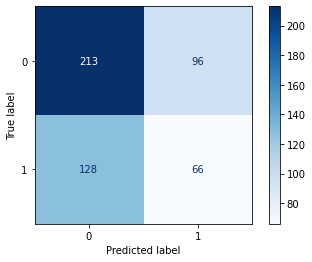

KNeighbors Classifier - Vanilla Train Report:

              precision    recall  f1-score   support

           0       0.71      0.83      0.76       891
           1       0.67      0.52      0.58       617

    accuracy                           0.70      1508
   macro avg       0.69      0.67      0.67      1508
weighted avg       0.70      0.70      0.69      1508

KNeighbors Classifier - Vanilla Test Report:

              precision    recall  f1-score   support

           0       0.62      0.69      0.66       309
           1       0.41      0.34      0.37       194

    accuracy                           0.55       503
   macro avg       0.52      0.51      0.51       503
weighted avg       0.54      0.55      0.55       503



In [18]:
model = KNeighborsClassifier()

knc = ds_models(model, X, y, model_name='KNeighbors Classifier - Vanilla', output='class')

### Logistic Regression - Vanilla

Logistic Regression - Vanilla Train Data Confusion Matrix:



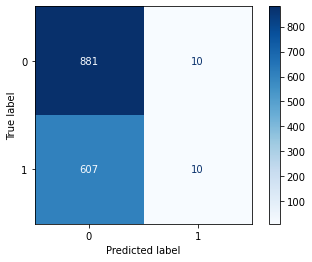

Logistic Regression - Vanilla Test Data Confusion Matrix:



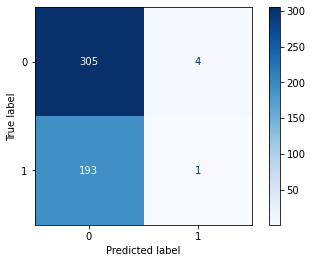

Logistic Regression - Vanilla Train Report:

              precision    recall  f1-score   support

           0       0.59      0.99      0.74       891
           1       0.50      0.02      0.03       617

    accuracy                           0.59      1508
   macro avg       0.55      0.50      0.39      1508
weighted avg       0.55      0.59      0.45      1508

Logistic Regression - Vanilla Test Report:

              precision    recall  f1-score   support

           0       0.61      0.99      0.76       309
           1       0.20      0.01      0.01       194

    accuracy                           0.61       503
   macro avg       0.41      0.50      0.38       503
weighted avg       0.45      0.61      0.47       503



In [19]:
model = LogisticRegression(fit_intercept = False, C = 1e12, solver='lbfgs', multi_class='auto')

lrc = ds_models(model, X, y, model_name='Logistic Regression - Vanilla', output='class')

### Decision Tree Classifier - Vanilla

Decision Tree Classifier - Vanilla Train Data Confusion Matrix:



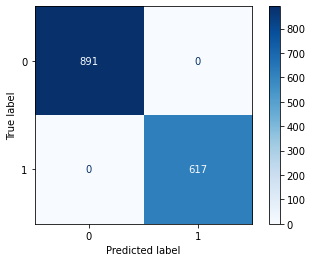

Decision Tree Classifier - Vanilla Test Data Confusion Matrix:



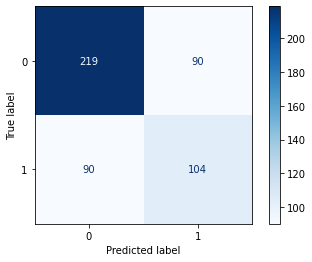

Decision Tree Classifier - Vanilla Train Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       891
           1       1.00      1.00      1.00       617

    accuracy                           1.00      1508
   macro avg       1.00      1.00      1.00      1508
weighted avg       1.00      1.00      1.00      1508

Decision Tree Classifier - Vanilla Test Report:

              precision    recall  f1-score   support

           0       0.71      0.71      0.71       309
           1       0.54      0.54      0.54       194

    accuracy                           0.64       503
   macro avg       0.62      0.62      0.62       503
weighted avg       0.64      0.64      0.64       503

Feature Importances:

[0.18220607 0.11825292 0.11911575 0.11450633 0.11869307 0.08057059
 0.10180018 0.09899767 0.06585743]


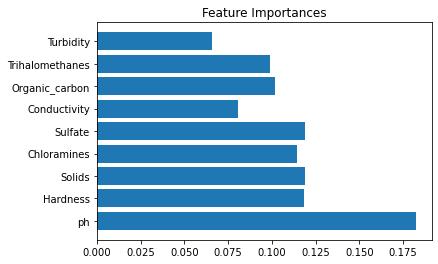

In [20]:
model = DecisionTreeClassifier()

dtc = ds_models(model, X, y, model_name='Decision Tree Classifier - Vanilla', output='class', fi=True)

### Bagging Classifier - Vanilla

Bagging Classifier - Vanilla Train Data Confusion Matrix:



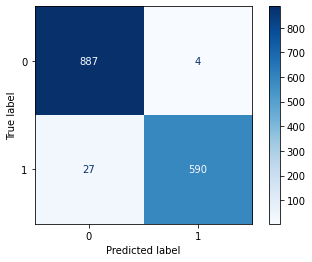

Bagging Classifier - Vanilla Test Data Confusion Matrix:



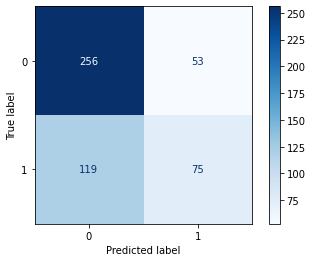

Bagging Classifier - Vanilla Train Report:

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       891
           1       0.99      0.96      0.97       617

    accuracy                           0.98      1508
   macro avg       0.98      0.98      0.98      1508
weighted avg       0.98      0.98      0.98      1508

Bagging Classifier - Vanilla Test Report:

              precision    recall  f1-score   support

           0       0.68      0.83      0.75       309
           1       0.59      0.39      0.47       194

    accuracy                           0.66       503
   macro avg       0.63      0.61      0.61       503
weighted avg       0.65      0.66      0.64       503



In [21]:
model = BaggingClassifier()

bc = ds_models(model, X, y, model_name='Bagging Classifier - Vanilla', output='class')

### Random Forest Classifier - Vanilla

Randmon Forest Classifier - Vanilla Train Data Confusion Matrix:



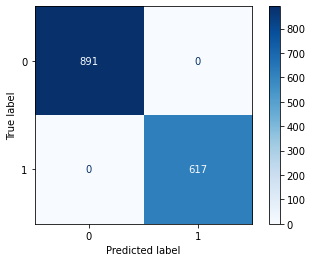

Randmon Forest Classifier - Vanilla Test Data Confusion Matrix:



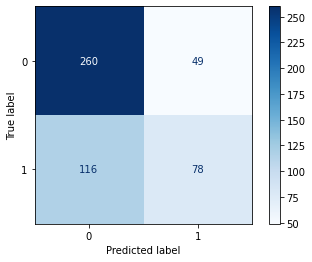

Randmon Forest Classifier - Vanilla Train Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       891
           1       1.00      1.00      1.00       617

    accuracy                           1.00      1508
   macro avg       1.00      1.00      1.00      1508
weighted avg       1.00      1.00      1.00      1508

Randmon Forest Classifier - Vanilla Test Report:

              precision    recall  f1-score   support

           0       0.69      0.84      0.76       309
           1       0.61      0.40      0.49       194

    accuracy                           0.67       503
   macro avg       0.65      0.62      0.62       503
weighted avg       0.66      0.67      0.65       503

Feature Importances:

[0.13792587 0.11281441 0.10393703 0.1216168  0.14813689 0.09294213
 0.09362697 0.09640426 0.09259565]


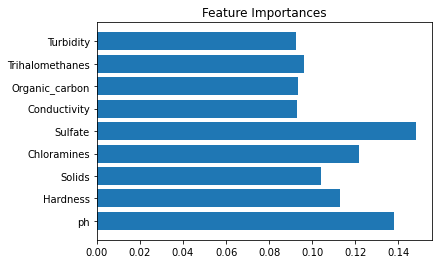

In [22]:
model = RandomForestClassifier()

rfc = ds_models(model, X, y, model_name='Randmon Forest Classifier - Vanilla', output='class', fi=True)

### Adaptive Boosting Classifier - Vanilla

Adaptive Boosting Classifier - Vanilla Train Data Confusion Matrix:



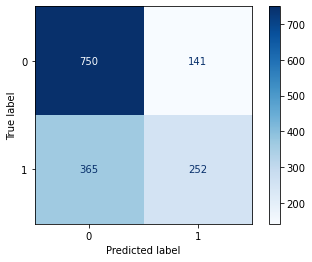

Adaptive Boosting Classifier - Vanilla Test Data Confusion Matrix:



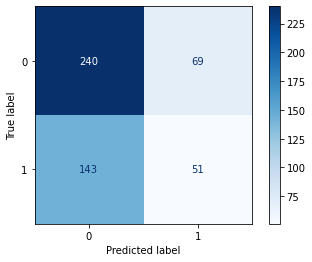

Adaptive Boosting Classifier - Vanilla Train Report:

              precision    recall  f1-score   support

           0       0.67      0.84      0.75       891
           1       0.64      0.41      0.50       617

    accuracy                           0.66      1508
   macro avg       0.66      0.63      0.62      1508
weighted avg       0.66      0.66      0.65      1508

Adaptive Boosting Classifier - Vanilla Test Report:

              precision    recall  f1-score   support

           0       0.63      0.78      0.69       309
           1       0.42      0.26      0.32       194

    accuracy                           0.58       503
   macro avg       0.53      0.52      0.51       503
weighted avg       0.55      0.58      0.55       503

Feature Importances:

[0.18 0.16 0.04 0.1  0.12 0.02 0.16 0.12 0.1 ]


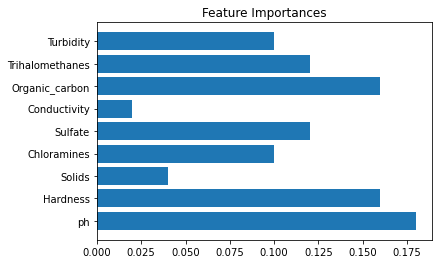

In [23]:
model = AdaBoostClassifier()

abc = ds_models(model, X, y, model_name='Adaptive Boosting Classifier - Vanilla', output='class', fi=True)

### Gradient Boosting Classifier - Vanilla

Gradient Boosting Classifier - Vanilla Train Data Confusion Matrix:



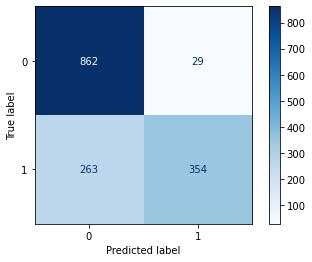

Gradient Boosting Classifier - Vanilla Test Data Confusion Matrix:



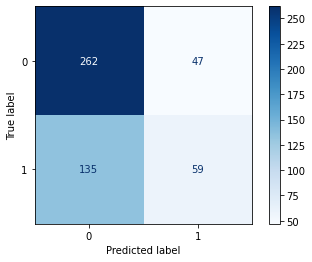

Gradient Boosting Classifier - Vanilla Train Report:

              precision    recall  f1-score   support

           0       0.77      0.97      0.86       891
           1       0.92      0.57      0.71       617

    accuracy                           0.81      1508
   macro avg       0.85      0.77      0.78      1508
weighted avg       0.83      0.81      0.79      1508

Gradient Boosting Classifier - Vanilla Test Report:

              precision    recall  f1-score   support

           0       0.66      0.85      0.74       309
           1       0.56      0.30      0.39       194

    accuracy                           0.64       503
   macro avg       0.61      0.58      0.57       503
weighted avg       0.62      0.64      0.61       503

Feature Importances:

[0.23773334 0.0998777  0.07684729 0.13310009 0.19711011 0.04419643
 0.07107916 0.07711463 0.06294125]


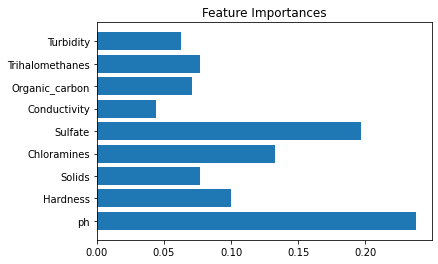

In [24]:
model = GradientBoostingClassifier()

gbc = ds_models(model, X, y, model_name='Gradient Boosting Classifier - Vanilla', output='class', fi=True)

### Support Vector Classification - Vanilla

Support Vector Classification - Vanilla Train Data Confusion Matrix:



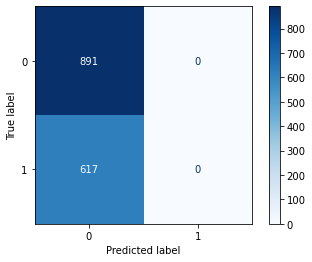

Support Vector Classification - Vanilla Test Data Confusion Matrix:



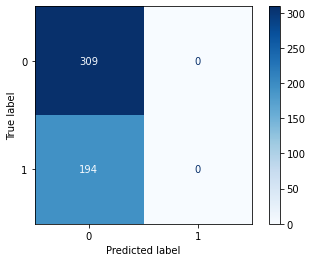

Support Vector Classification - Vanilla Train Report:

              precision    recall  f1-score   support

           0       0.59      1.00      0.74       891
           1       0.00      0.00      0.00       617

    accuracy                           0.59      1508
   macro avg       0.30      0.50      0.37      1508
weighted avg       0.35      0.59      0.44      1508

Support Vector Classification - Vanilla Test Report:

              precision    recall  f1-score   support

           0       0.61      1.00      0.76       309
           1       0.00      0.00      0.00       194

    accuracy                           0.61       503
   macro avg       0.31      0.50      0.38       503
weighted avg       0.38      0.61      0.47       503



In [25]:
model = SVC()

svc = ds_models(model, X, y, model_name='Support Vector Classification - Vanilla', output='class')